In [1]:
import warnings
warnings.filterwarnings('ignore')

### Automating Our Analysis

Here we are adopting our code from `data_cleaning_part1` to automate for all our participants. We will build a for loop that allows us loop over our raw data.

In [39]:
#Import libraries
import os
import pandas as pd
import seaborn as sns

In [40]:
fpath='../stroop/data/raw/'

In [41]:
flist=os.listdir(fpath)

In [42]:
flist

['10_stroop_2022-03-07_04h50.03.877.csv',
 '10_stroop_2022-03-07_04h50.03.877.log.gz',
 '11_stroop_2022-03-07_09h46.32.534.csv',
 '11_stroop_2022-03-07_09h46.32.534.log.gz',
 '13_stroop_2022-03-07_20h28.20.416.csv',
 '13_stroop_2022-03-07_20h28.20.416.log.gz',
 '14_stroop_2022-03-07_20h30.23.573.csv',
 '14_stroop_2022-03-07_20h30.23.573.log.gz',
 '15_stroop_2022-03-08_11h56.46.476.csv',
 '15_stroop_2022-03-08_11h56.46.476.log.gz',
 '17_stroop_2022-03-08_13h06.38.609.csv',
 '17_stroop_2022-03-08_13h06.38.609.log.gz',
 '19_stroop_2022-03-08_15h22.20.182.csv',
 '19_stroop_2022-03-08_15h22.20.182.log.gz',
 '1_stroop_2022-03-04_12h20.01.148.csv',
 '1_stroop_2022-03-04_12h20.01.148.log.gz',
 '20_stroop_2022-03-08_16h15.38.688.csv',
 '20_stroop_2022-03-08_16h15.38.688.log.gz',
 '22_stroop_2022-03-08_16h22.44.093.csv',
 '23_stroop_2022-03-08_16h23.17.946.csv',
 '23_stroop_2022-03-08_16h23.17.946.log.gz',
 '24_stroop_2022-03-08_16h36.21.964.csv',
 '24_stroop_2022-03-08_16h36.21.964.log.gz',
 '2

You will notice that all files not `.csv`
We can write a simple if-loop that uses memebership operator `in` to make a new list of file names

In [43]:
new_flist=[]
for fname in flist:
    if '.csv' in fname:
        new_flist.append(fname)
    else:
        print(f'Sorry {fname} is not a csv file')

Sorry 10_stroop_2022-03-07_04h50.03.877.log.gz is not a csv file
Sorry 11_stroop_2022-03-07_09h46.32.534.log.gz is not a csv file
Sorry 13_stroop_2022-03-07_20h28.20.416.log.gz is not a csv file
Sorry 14_stroop_2022-03-07_20h30.23.573.log.gz is not a csv file
Sorry 15_stroop_2022-03-08_11h56.46.476.log.gz is not a csv file
Sorry 17_stroop_2022-03-08_13h06.38.609.log.gz is not a csv file
Sorry 19_stroop_2022-03-08_15h22.20.182.log.gz is not a csv file
Sorry 1_stroop_2022-03-04_12h20.01.148.log.gz is not a csv file
Sorry 20_stroop_2022-03-08_16h15.38.688.log.gz is not a csv file
Sorry 23_stroop_2022-03-08_16h23.17.946.log.gz is not a csv file
Sorry 24_stroop_2022-03-08_16h36.21.964.log.gz is not a csv file
Sorry 27_stroop_2022-03-08_16h47.45.014.log.gz is not a csv file
Sorry 29_stroop_2022-03-08_17h02.43.138.log.gz is not a csv file
Sorry 2_stroop_2022-03-05_12h34.55.257.log.gz is not a csv file
Sorry 6_stroop_2022-03-05_15h25.08.296.log.gz is not a csv file
Sorry 8_stroop_2022-03-06_09

Before looping over all files lets grab our single file code

In [44]:
new_flist

['10_stroop_2022-03-07_04h50.03.877.csv',
 '11_stroop_2022-03-07_09h46.32.534.csv',
 '13_stroop_2022-03-07_20h28.20.416.csv',
 '14_stroop_2022-03-07_20h30.23.573.csv',
 '15_stroop_2022-03-08_11h56.46.476.csv',
 '17_stroop_2022-03-08_13h06.38.609.csv',
 '19_stroop_2022-03-08_15h22.20.182.csv',
 '1_stroop_2022-03-04_12h20.01.148.csv',
 '20_stroop_2022-03-08_16h15.38.688.csv',
 '22_stroop_2022-03-08_16h22.44.093.csv',
 '23_stroop_2022-03-08_16h23.17.946.csv',
 '24_stroop_2022-03-08_16h36.21.964.csv',
 '27_stroop_2022-03-08_16h47.45.014.csv',
 '29_stroop_2022-03-08_17h02.43.138.csv',
 '2_stroop_2022-03-05_12h34.55.257.csv',
 '6_stroop_2022-03-05_15h25.08.296.csv',
 '8_stroop_2022-03-06_09h48.32.318.csv',
 '9_stroop_2022-03-06_20h14.51.900.csv']

In [45]:
fname='../stroop/data/raw/2_stroop_2022-03-05_12h34.55.257.csv'
fname=f'../stroop/data/raw/{new_flist[-7]}'
fname

'../stroop/data/raw/24_stroop_2022-03-08_16h36.21.964.csv'

In [46]:
import os
cwd=os.getcwd()
cwd

'D:\\A-NYU\\Python_JupterNotebook_Workspace\\SciProgramming_SP22\\code'

revisit code and the logic

- load df
- select the columns and rename 
- select rows
- decide to either keep or discard the participant

- combine dfs

In [47]:
df=pd.read_csv(fname)

# Select columns of interest:
cols = ['infoType', 'thisWord', 'thisColor', 'condition', 'corrAns', 'participant', 'key_resp.keys', 'key_resp.rt', 'trials.thisN']
df1 = df[cols]
##rename
rename_dict = {'key_resp.keys': 'key_resp', 
              'key_resp.rt': 'key_rt',
              'trials.thisN':'trialNum'}
df1.rename(columns=rename_dict, inplace=True)

#Select rows of interesr
df2=df1[df1['infoType']=="trial"].reset_index(drop=True)


#Set variable
uid='2'
fpath=f'../stroop/data/clean/{uid}_clean.csv'

#Quality check
nan_count = df2['key_resp'].isna().sum()
threshold=32*0.25

if nan_count>threshold:
    print('consider dropping this participant')
    
else:
    #set uid
    uid=df2['participant'].unique()[-1]
    
    #set filepath
    fpath=f'../stroop/data/clean/{uid}_clean.csv'
    
    #drop NAN values and save
    df2.dropna(inplace=True)
    df2=df2.reset_index(drop=True)
    df2.to_csv(fpath)

We can loop over all the file names in `new_flist` and save `df2` (clean data) to a list

In [48]:
dfs=[]

for fname in new_flist:
    fpath1=f'../stroop/data/raw/{fname}'
    try:
        df=pd.read_csv(fpath1)
    except:
        print("the csv is empty")
    else:
        
        # Select columns of interest:
        cols = ['infoType', 'thisWord', 'thisColor', 'condition', 'corrAns', 'participant', 'key_resp.keys', 'key_resp.rt', 'trials.thisN']
        df1 = df[cols]
        ##rename
        rename_dict = {'key_resp.keys': 'key_resp', 
                      'key_resp.rt': 'key_rt',
                      'trials.thisN':'trialNum'}
        df1.rename(columns=rename_dict, inplace=True)

        #Select rows of interesr
        df2=df1[df1['infoType']=="trial"].reset_index(drop=True)


        #Quality check
        nan_count = df2['key_resp'].isna().sum()
        threshold=32*0.25
        if nan_count>threshold:
            print('consider dropping this participant')
        else:
            #set uid
            uid=df2['participant'].unique()[-1]
            #set filepath
            fpath=f'../stroop/data/clean/{uid}_clean.csv'
            #drop NAN values and save
            df2.dropna(inplace=True)
            df2=df2.reset_index(drop=True)
            df2.to_csv(fpath)
            print(f'Clean data for {uid} stored at {fpath}')
            #append df2 to dfs
            dfs.append(df2)

Clean data for 10 stored at ../stroop/data/clean/10_clean.csv
Clean data for 11 stored at ../stroop/data/clean/11_clean.csv
Clean data for 13 stored at ../stroop/data/clean/13_clean.csv
Clean data for 14 stored at ../stroop/data/clean/14_clean.csv
Clean data for 15 stored at ../stroop/data/clean/15_clean.csv
Clean data for 17 stored at ../stroop/data/clean/17_clean.csv
Clean data for 19 stored at ../stroop/data/clean/19_clean.csv
Clean data for 1 stored at ../stroop/data/clean/1_clean.csv
Clean data for 20 stored at ../stroop/data/clean/20_clean.csv


KeyError: "['key_resp.keys', 'key_resp.rt', 'trials.thisN'] not in index"

**Why did this break?**

In [49]:
df

,key_resp_3.keys,key_resp_3.rt,key_resp_2.keys,key_resp_2.rt,key_resp_4.keys,key_resp_4.rt,trialsInst.thisRepN,trialsInst.thisTrialN,trialsInst.thisN,trialsInst.thisIndex,...,thisWord,thisColor,condition,corrAns,participant,date,expName,psychopyVersion,OS,frameRate
0,space,2.209,space,7.4061,1,0.8259,0,0,0,0,...,RED,red,congruent,1,22,2022-03-08_16h22.44.093,stroop,2021.1.4,MacIntel,60.0024
1,NaN,NaN,NaN,NaN,0,1.5742,0,1,1,1,...,YELLOW,yellow,incongruent,0,22,2022-03-08_16h22.44.093,stroop,2021.1.4,MacIntel,60.0024
2,NaN,NaN,NaN,NaN,2,0.9325,0,2,2,2,...,YELLOW,blue,incongruent,2,22,2022-03-08_16h22.44.093,stroop,2021.1.4,MacIntel,60.0024


In [50]:
df.columns

Index(['key_resp_3.keys', 'key_resp_3.rt', 'key_resp_2.keys', 'key_resp_2.rt',
       'key_resp_4.keys', 'key_resp_4.rt', 'trialsInst.thisRepN',
       'trialsInst.thisTrialN', 'trialsInst.thisN', 'trialsInst.thisIndex',
       'trialsInst.ran', 'infoType', 'thisWord', 'thisColor', 'condition',
       'corrAns', 'participant', 'date', 'expName', 'psychopyVersion', 'OS',
       'frameRate'],
      dtype='object')

In [51]:
cols

['infoType',
 'thisWord',
 'thisColor',
 'condition',
 'corrAns',
 'participant',
 'key_resp.keys',
 'key_resp.rt',
 'trials.thisN']

In [52]:
'key_resp.keys' in df.columns

False

In [53]:
if 'key_resp.keys' in df.columns

SyntaxError: invalid syntax (Temp/ipykernel_9476/3273705152.py, line 1)

In [54]:
dfs=[]

for fname in new_flist:
    fpath1=f'../stroop/data/raw/{fname}'
    df=pd.read_csv(fpath1)
    
    if 'key_resp.keys' not in df.columns:
        print(f'Incomplete dataset - {fname}')
    #for this iteration the rest of the lines will be ignored
        continue
        # the continue is for the for loop, keep the loop but ignore the following lines for this fname

    # Select columns of interest:
    cols = ['infoType', 'thisWord', 'thisColor', 'condition', 'corrAns', 'participant', 'key_resp.keys', 'key_resp.rt', 'trials.thisN']
    df1 = df[cols]
    ##rename
    rename_dict = {'key_resp.keys': 'key_resp', 
                  'key_resp.rt': 'key_rt',
                  'trials.thisN':'trialNum'}
    df1.rename(columns=rename_dict, inplace=True)

    #Select rows of interesr
    df2=df1[df1['infoType']=="trial"].reset_index(drop=True)


    #Quality check
    nan_count = df2['key_resp'].isna().sum()
    threshold=32*0.25
    if nan_count>threshold:
        print('consider dropping this participant')
    else:
        #set uid
        uid=df2['participant'].unique()[-1]
        #set filepath
        fpath=f'../stroop/data/clean/{uid}_clean.csv'
        #drop NAN values and save
        df2.dropna(inplace=True)
        df2=df2.reset_index(drop=True)
        df2.to_csv(fpath)
        print(f'Clean data for {uid} stored at {fpath}')
        #append df2 to dfs
        dfs.append(df2)

Clean data for 10 stored at ../stroop/data/clean/10_clean.csv
Clean data for 11 stored at ../stroop/data/clean/11_clean.csv
Clean data for 13 stored at ../stroop/data/clean/13_clean.csv
Clean data for 14 stored at ../stroop/data/clean/14_clean.csv
Clean data for 15 stored at ../stroop/data/clean/15_clean.csv
Clean data for 17 stored at ../stroop/data/clean/17_clean.csv
Clean data for 19 stored at ../stroop/data/clean/19_clean.csv
Clean data for 1 stored at ../stroop/data/clean/1_clean.csv
Clean data for 20 stored at ../stroop/data/clean/20_clean.csv
Incomplete dataset - 22_stroop_2022-03-08_16h22.44.093.csv
Clean data for 23 stored at ../stroop/data/clean/23_clean.csv
Clean data for 24 stored at ../stroop/data/clean/24_clean.csv
Clean data for 27 stored at ../stroop/data/clean/27_clean.csv
Clean data for 29 stored at ../stroop/data/clean/29_clean.csv
Clean data for 2 stored at ../stroop/data/clean/2_clean.csv
Clean data for 6 stored at ../stroop/data/clean/6_clean.csv
Incomplete datase

We can concatenate these dataframes to create a master dataset. 

In [61]:
dfs

[   infoType thisWord thisColor    condition  corrAns  participant  key_resp  \
 0     trial    GREEN     green    congruent      9.0           10       9.0   
 1     trial   YELLOW    yellow    congruent      0.0           10       0.0   
 2     trial    GREEN       red  incongruent      1.0           10       1.0   
 3     trial   YELLOW    yellow    congruent      0.0           10       0.0   
 4     trial      RED       red    congruent      1.0           10       1.0   
 5     trial      RED     green  incongruent      9.0           10       9.0   
 6     trial     BLUE      blue    congruent      2.0           10       2.0   
 7     trial      RED       red    congruent      1.0           10       1.0   
 8     trial     BLUE     green  incongruent      9.0           10       9.0   
 9     trial     BLUE      blue    congruent      2.0           10       2.0   
 10    trial     BLUE    yellow  incongruent      0.0           10       0.0   
 11    trial    GREEN    yellow  incongr

In [60]:
pd.concat(dfs)

,infoType,thisWord,thisColor,condition,corrAns,participant,key_resp,key_rt,trialNum
0,trial,GREEN,green,congruent,9.0,10,9.0,0.9056,0.0
1,trial,YELLOW,yellow,congruent,0.0,10,0.0,0.6254,1.0
2,trial,GREEN,red,incongruent,1.0,10,1.0,0.5502,2.0
3,trial,YELLOW,yellow,congruent,0.0,10,0.0,0.7859,3.0
4,trial,RED,red,congruent,1.0,10,1.0,0.7346,4.0
...,...,...,...,...,...,...,...,...,...
27,trial,RED,red,congruent,1.0,9,2.0,0.5089,27.0
28,trial,GREEN,red,incongruent,1.0,9,1.0,0.5385,28.0
29,trial,RED,blue,incongruent,2.0,9,2.0,0.5180,29.0
30,trial,YELLOW,red,incongruent,1.0,9,1.0,0.4644,30.0


In [62]:
df_all=pd.concat(dfs)

In [63]:
df_all

,infoType,thisWord,thisColor,condition,corrAns,participant,key_resp,key_rt,trialNum
0,trial,GREEN,green,congruent,9.0,10,9.0,0.9056,0.0
1,trial,YELLOW,yellow,congruent,0.0,10,0.0,0.6254,1.0
2,trial,GREEN,red,incongruent,1.0,10,1.0,0.5502,2.0
3,trial,YELLOW,yellow,congruent,0.0,10,0.0,0.7859,3.0
4,trial,RED,red,congruent,1.0,10,1.0,0.7346,4.0
...,...,...,...,...,...,...,...,...,...
27,trial,RED,red,congruent,1.0,9,2.0,0.5089,27.0
28,trial,GREEN,red,incongruent,1.0,9,1.0,0.5385,28.0
29,trial,RED,blue,incongruent,2.0,9,2.0,0.5180,29.0
30,trial,YELLOW,red,incongruent,1.0,9,1.0,0.4644,30.0


In [64]:
df_all.to_csv('../stroop/data/summary/data_master.csv')

### Summary RTs

In [65]:
df_rt=df_all.groupby('condition').mean()['key_rt'].to_frame()

In [66]:
df_rt

,key_rt
condition,
congruent,0.625477
incongruent,0.655219


In [67]:
df_rt.to_csv('../stroop/data/summary/rt_summary.csv')

### Vizualization

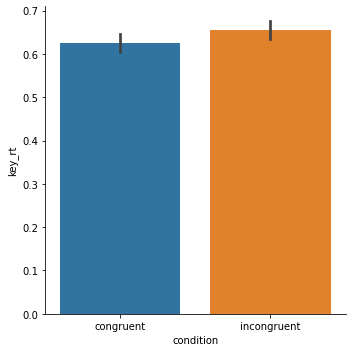

In [68]:
sns.catplot(x='condition', y='key_rt', data=df_all, kind='bar')